# <a href="https://miptstats.github.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Домашнее задание 7

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_pds_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков можно использовать без ограничений.**

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 15 баллов
* Задача 2 &mdash; 20 баллов
* Задача 3 &mdash;  30 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 4 &mdash; 20 баллов


-----

In [1]:
import pandas as pd
import scipy.stats as sps
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
from tqdm import tqdm
import math

## Задача 1

Проверьте, отличается ли средний балл студентов курса Phystech@DataScience за лекгкую часть задания 3 и 5 весной 2023.

Данные возьмите из [таблицы оценок](https://docs.google.com/spreadsheets/d/1GSw2_vAMQ4XZcAf8Y_99CkJ1oi4_LrHyWIS-DCdFE0Y/edit?usp=sharing). Не забудьте визуализировать данные с помощью ядерной оценки плотности (вам поможет функция `sns.kdeplot`) и оценить сдвиг.



In [185]:
data3 = np.array([74,0,72,50,0,0,74,0,57.5,56,0,47,41,48,58,0,56.5,0,0,48,59,0,0,0,0,52,18,43,66,69,48,0,0,0,74,0,60,35,28,68,\
                  45,0,43.5,0,40,59,30,78,62,68,66,0,0,0,31,0,0,0,81,0,0,39,56.5,48,0,65.5,68,79,0,56,0,82,0,0,81,45,0,61.5,0,\
                  0,76,77,77,0,70,70,0,44,76,84,64,0,0,5,0,70,18,0,0,77,53.5,16,59,75,38,0,52,0,81,0,0,73.5,77.5,0,74.5,28,47,\
                  0,74,54,84.5,73,68,66.5,74,0,67,82,38,15,75,0,58,80,0,85,80,8,75,55,53,0,82.5,69.5,0,79,77,82,0,65.5,46,36,\
                  84,0,0,78.5,25,74,60.5,0,63,68,0,46,43,53,65,0,65])
data5 = np.array([85,0,0,27,0,0,53,0,70,37.5,34.5,33,0,22,70,0,75,0,0,7,69,0,0,0,0,87,0,60,0,75,59,0,0,0,82,77,82,56.5,47.5,\
                   0,18.5,12,69,0,0,0,20,85,68.5,43,59.5,15,0,0,0,0,0,0,87,0,0,0,34,31,0,59,33.5,38,0,65,0,83.5,15,0,85,24,0,\
                   0,0,0,74,82,36,0,0,78,0,53,78,70,22.5,0,0,22,47,61,0,0,18,38,65,0,63,60,19,62,16.5,0,78,68,42,60,33,0,63,\
                   42,0,0,83,0,87,65,85,43,69,0,41,55,45,30,0,0,52,85,0,83,30,47,27,68,38,0,85,0,0,32,47,81,0,72,33,75,64,0,\
                   0,0,0,0,7,0,0,85,31,37,0,50,67,0,50])

Уберем людей, которые ничего не делали

In [186]:
for i in np.arange(0,np.size(data3)):
    if data3[i] == data5[i] == 0:
        data3[i] = data5[i] = -1
score3 = data3[data3 >= 0]
score5 = data5[data5 >= 0]

Посмотрим на распределение:

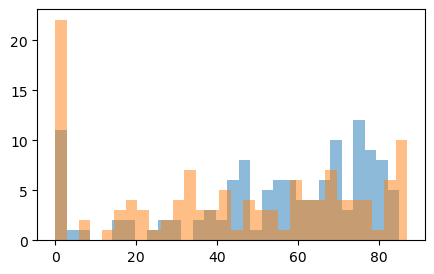

In [187]:
plt.figure(figsize=(5,3))
plt.hist(score3, bins = 30, alpha = 0.5)
plt.hist(score5, bins = 30, alpha = 0.5);

Тут явно не нормальное, поэтому сравнивать средние придётся через бутстреп либо критерий Вальда

Выборки связные

In [188]:
def estimator(sample):
    return sample.mean(axis = 1)

def bootstrap(X,Y, B=100_000):
    n = len(X)  # длина выборки
    i_array = np.random.randint(0, n, (B, n))
    X_Y = np.array([[X[i]-Y[i] for i in i_array[j]] for j in range(B)])
    return estimator(X_Y)
def boostrap_quantile_confidence_interval(bootstrap_estimations, alpha=0.95):
    sort_boot = np.array(sorted(bootstrap_estimations))
    B = len(bootstrap_estimations)
    return np.array([sort_boot[math.floor(B*(1-alpha)/2)],\
                     sort_boot[math.ceil(B*(1+alpha)/2)]])

In [189]:
boots = bootstrap(score3,score5, 100000)
print(boostrap_quantile_confidence_interval(boots).round(2))

[ 4.66 15.69]


0 не принадлежит ДИ, поэтому отвергаем гипотезу о равенстве средних

Теперь через Вальда:

In [195]:
delta = score3 - score5
alpha = 0.95
interval = np.array([delta.mean() - sps.norm.ppf(1-alpha/2)*np.sqrt(delta.var()/np.size(delta)),\
                     delta.mean() + sps.norm.ppf(1-alpha/2)*np.sqrt(delta.var()/np.size(delta))])
print(interval.round(2))

[10.01 10.37]


Так тем более не 0

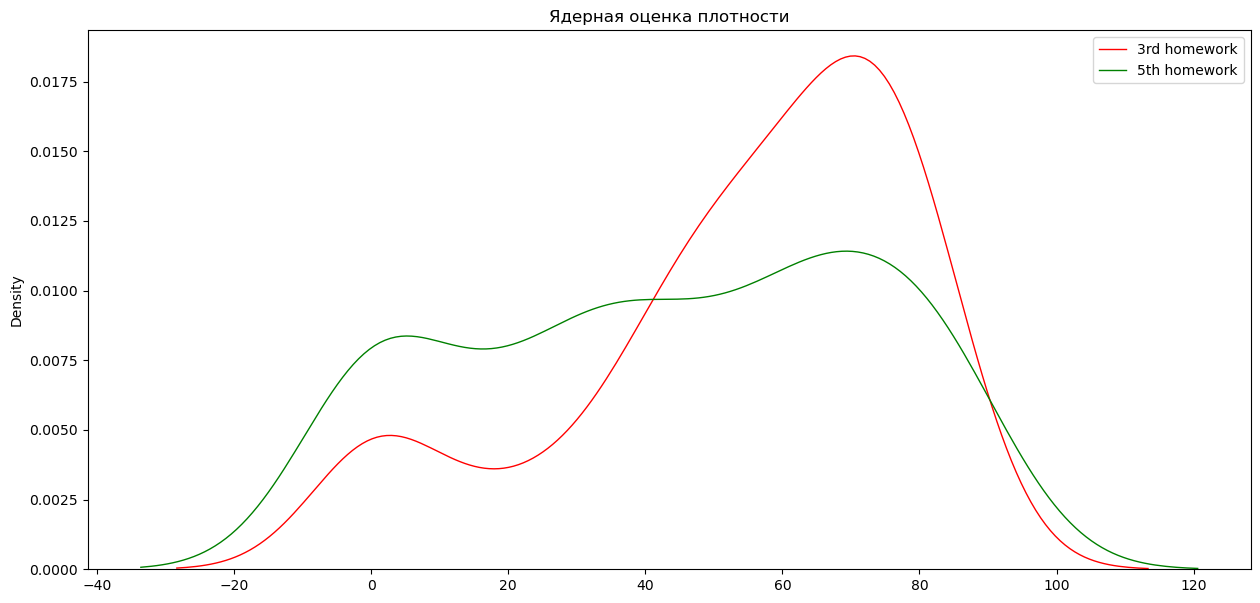

In [50]:
plt.figure(figsize=(15, 7))
plt.title("Ядерная оценка плотности")
sns.kdeplot(data=score3, lw=1, color = 'red', alpha = 1, label = '3rd homework' )
sns.kdeplot(data=score5, lw=1, color = 'green', alpha = 1, label = '5th homework' )
plt.legend()
plt.plot();

Сделайте общий вывод по задаче.

**Вывод:** 

Средние оценки по 2м заданиям оказались различными

Можно было использовать и другие Бут. ДИ, но я выбрал квантильный, а в качестве статистики - среднее от разности бутстрепных выборок.

## Задача 2
Рассмотрите таблицу с оценками по какому-либо курсу с несколькими семинарскими группами. Выберите свою группу и еще какую-нибудь. Проверьте гипотезу о том, что средний балл не отличается между семинарскими группами. Не забывайте про визуализацию.

Сделайте выводы.

Я взял оценки по этому курсу по семинарам и поделил всех посередине на 2 равные группы случайно, причем оценки взял как процент от максимума, нули убрал.

In [15]:
data = np.array([0.415384615,0.476923077,0.584615385,0.476923077,0.230769231,0.869230769,0.261538462,0.646153846,0.415384615,\
                 0.276923077,0.876923077,0.492307692,0.553846154,0.746153846,0.946153846,0.307692308,0.946153846,0.6,\
                 0.223076923,0.415384615,0.915384615,0.446153846,0.761538462,0.830769231,0.861538462,0.169230769,0.353846154,0.2,\
                 0.307692308,0.830769231,0.392307692,0.953846154,0.753846154,0.853846154,0.792307692,0.507692308,\
                 0.169230769,0.307692308,0.323076923,0.461538462,0.676923077,0.838461538,0.938461538,0.746153846,0.646153846,\
                 0.961538462,0.123076923,0.230769231,0.938461538,0.307692308,0.576923077,0.761538462,0.207692308,0.907692308,\
                 0.769230769,0.715384615,0.415384615,0.907692308,0.984615385,0.353846154,0.061538462,0.384615385,0.453846154,\
                 0.930769231,0.746153846,0.730769231,0.476923077,0.984615385,0.907692308,0.846153846,0.923076923,0.584615385,\
                 0.569230769,0.169230769,0.6,0.438461538,0.661538462,0.446153846,0.307692308,0.6,0.707692308,0.830769231,\
                 0.476923077,0.638461538,0.746153846,0.607692308,0.892307692,0.592307692,0.538461538,0.869230769,1,0.292307692,\
                 0.961538462,0.584615385,0.838461538,0.930769231,0.2,0.907692308,0.684615385,0.923076923,0.230769231,\
                 0.546153846,0.153846154,0.653846154,0.907692308,0.376923077,0.430769231,0.961538462,0.907692308,0.838461538,\
                 0.930769231,0.3,0.861538462,0.830769231,0.853846154,0.261538462,0.969230769,0.838461538,0.338461538,\
                 0.630769231,0.892307692,0.953846154,0.538461538,0.823076923,0.684615385,0.753846154,0.207692308,0.369230769,\
                 0.907692308,0.584615385,0.507692308,0.776923077,0.584615385,0.742307692,0.307692308,0.938461538,0.9,0.792307692])
group1, group2 = data[:69], data[69:]

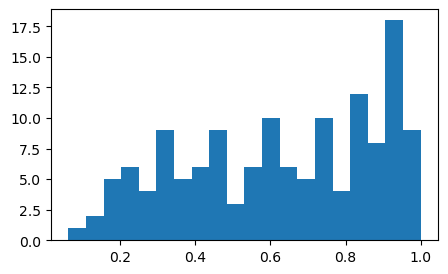

In [16]:
plt.figure(figsize=(5,3))
plt.hist(data,bins = 20);

Снова не нормальное, поэтому нужно бутстреп либо общий случай для независимых выборок

In [193]:
boots = bootstrap(group1,group2, 100000)
print(boostrap_quantile_confidence_interval(boots).round(2))

[-0.15  0.02]


In [191]:
delta = group1 - group2
alpha = 0.05
interval = np.array([delta.mean() - sps.norm.ppf(1-alpha/2)*np.sqrt(group1.var()/np.size(group1)+group2.var()/np.size(group2)),\
                     delta.mean() + sps.norm.ppf(1-alpha/2)*np.sqrt(group1.var()/np.size(group1)+group2.var()/np.size(group2))])
print(interval.round(4))

[-0.1546  0.0149]


**Вывод:** 

0 лежит в бутстрепном ДИ, поэтому мы не отвергаем гипотезу о равенстве средних

для общего случая независимых выборок аналогично



## Задача 3

#### Профиль физика

Скачайте [данные](https://www.kaggle.com/datasets/naharrison/particle-identification-from-detector-responses?resource=download) моделирования неупругого рассеяния протонов и электронов. В датасете представлены 4 разных вида частиц (частицы одного вида имеют одинаковый id).

In [197]:
path = 'pidM.csv'
data = pd.read_csv(path)
print(data['id'].unique())
data.describe()

[ 211 2212  321  -11]


,id,p,theta,beta,nphe,ein,eout
count,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06
mean,9.941839e+02,1.230053e+00,4.889321e-01,8.995796e-01,3.575243e+00,5.635883e-02,7.033195e-02
std,9.724034e+02,7.414895e-01,2.942161e-01,1.132321e-01,1.779236e+01,7.882675e-02,1.020604e-01
min,-1.100000e+01,2.101170e-01,9.222140e-02,5.500010e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.110000e+02,6.657510e-01,2.817420e-01,8.378760e-01,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.110000e+02,1.066150e+00,4.048670e-01,9.461940e-01,0.000000e+00,3.442440e-02,4.417490e-02
75%,2.212000e+03,1.649650e+00,6.117800e-01,9.855910e-01,0.000000e+00,6.834520e-02,9.365990e-02
max,2.212000e+03,5.286950e+00,2.219270e+00,1.499590e+00,3.490000e+02,8.993820e-01,1.097410e+00


Постройте гистограммы признаков для каждого вида частиц.

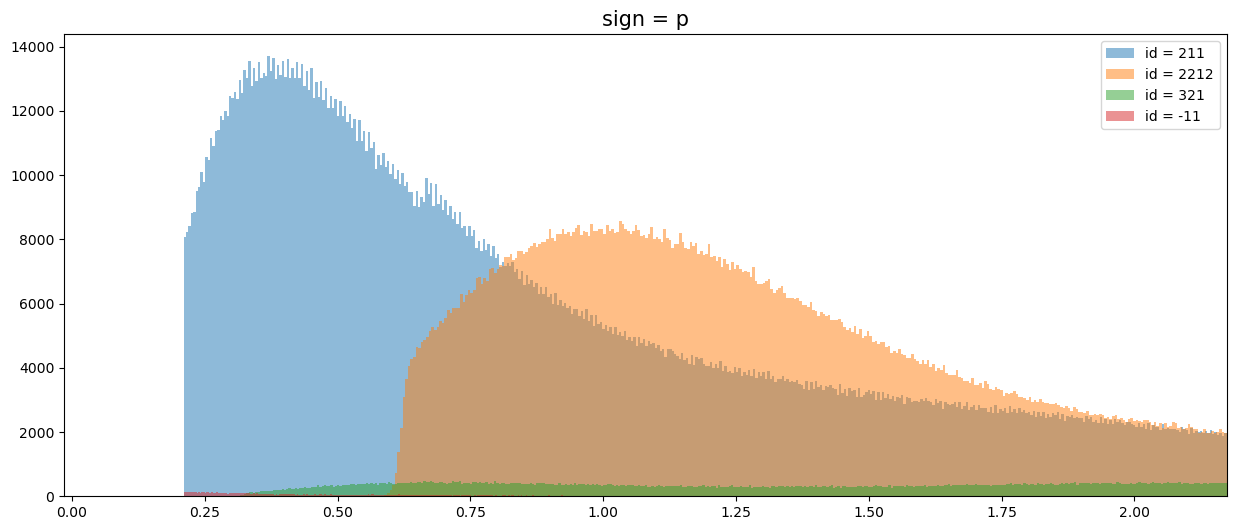

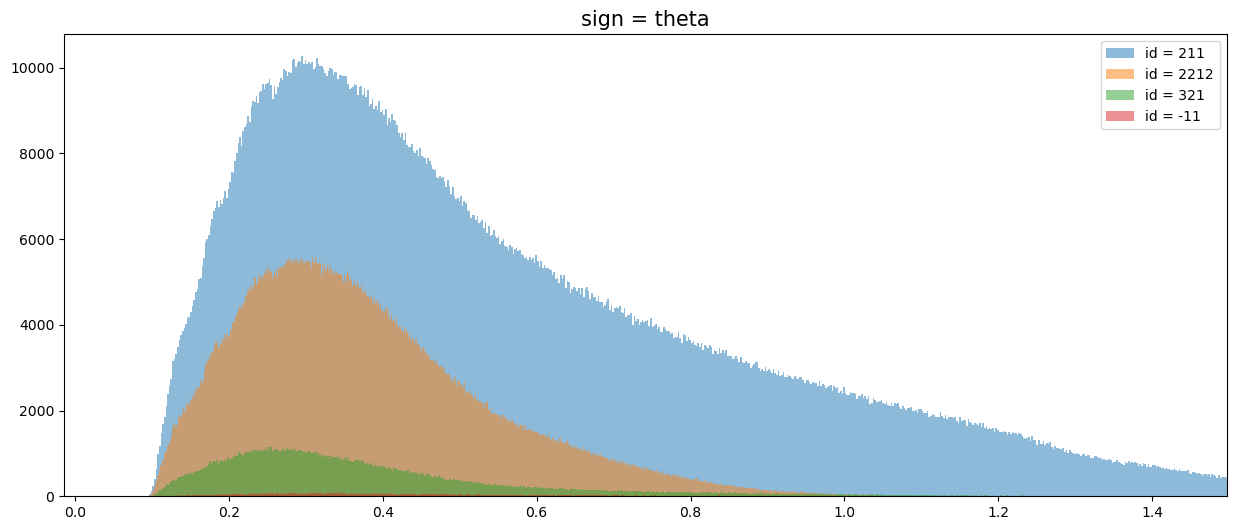

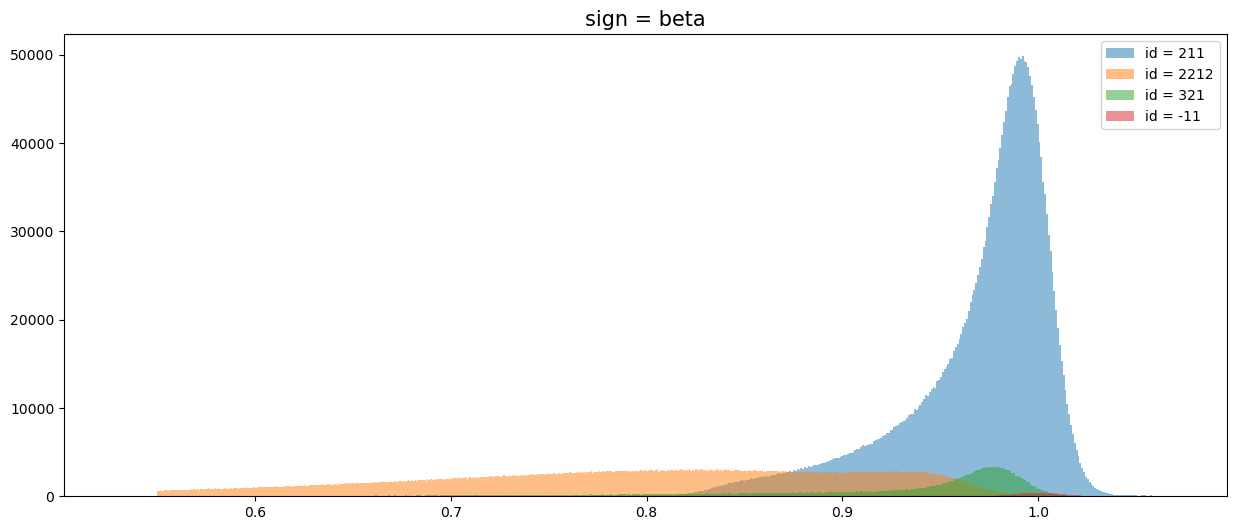

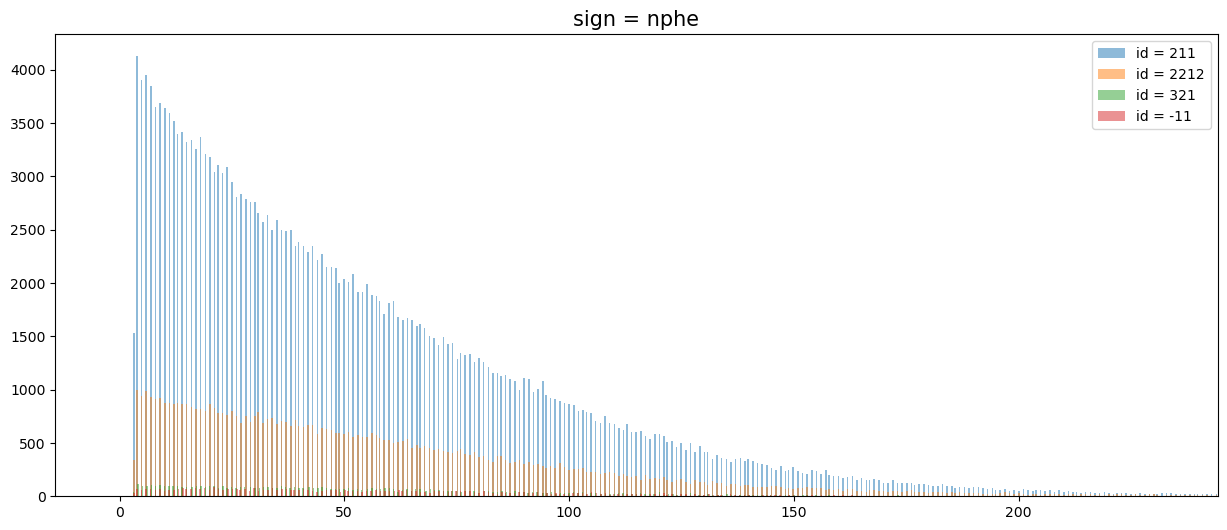

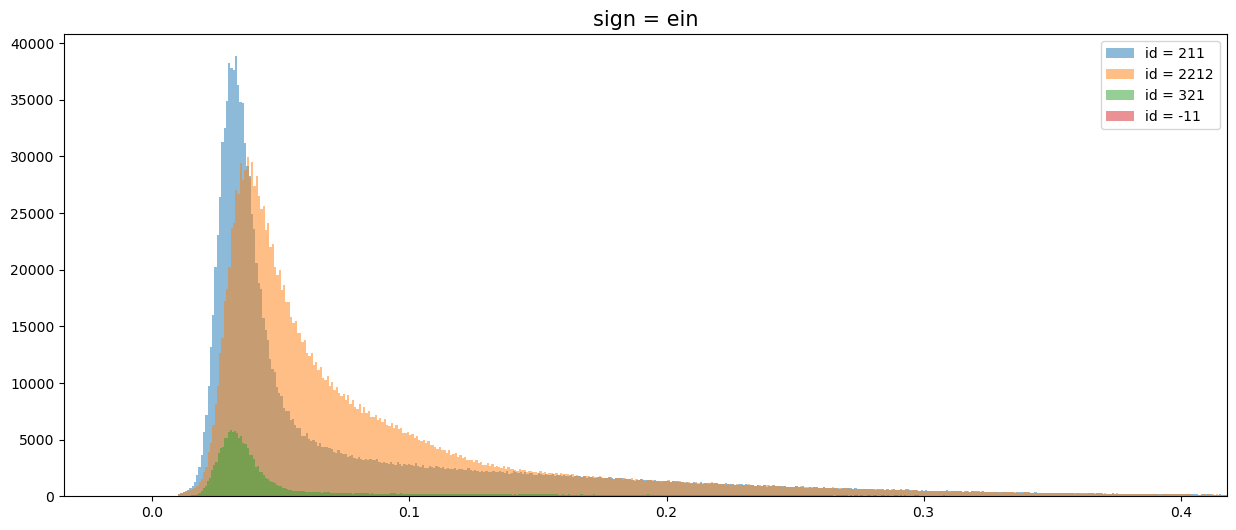

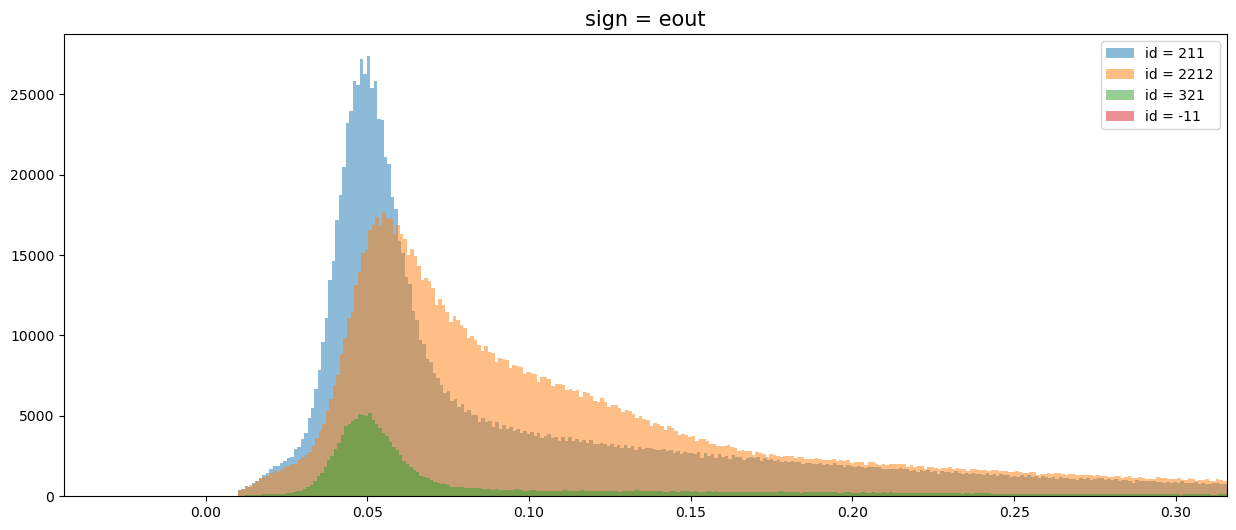

In [198]:
param = ['p','theta','beta','nphe','ein','eout']
for sign in param:
    f, ax = plt.subplots(1, figsize=(15,6))
    for id in data['id'].unique():
        sample = data[data.id == id]
        ax.hist(sample[sample != 0][sign], bins = 1000, alpha = 0.5, label = 'id = ' + str(id))
        ax.set_title('sign = ' + sign, fontsize=15)
        ax.legend()
        ax.set_xlim(xmax = sample[sample != 0][sign].mean() + 4*np.sqrt(sample[sample != 0][sign].var()))


Дополнительно отобразим id = -11

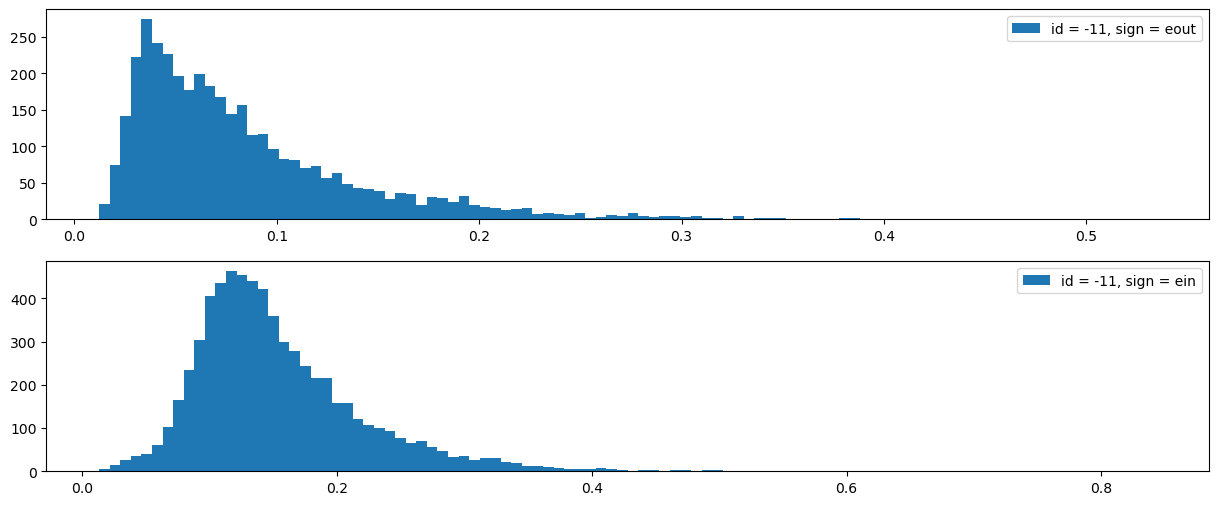

In [66]:
_, ax = plt.subplots(2, figsize=(15,6))
ax[0].hist(data[data != 0][data['id'] == -11]['eout'], bins = 100, label= 'id = -11, sign = eout');
ax[1].hist(data[data != 0][data['id'] == -11]['ein'], bins = 100, label= 'id = -11, sign = ein');
ax[0].legend();
ax[1].legend();

Для каждой частицы посчитайте среднее значение для каждой колонки с помощью `data.groupby`

In [199]:
data[data != 0].groupby(by = 'id').mean().round(3)

,p,theta,beta,nphe,ein,eout
id,,,,,,
-11,0.592,0.471,1.001,62.376,0.154,0.084
211,1.035,0.574,0.969,53.848,0.086,0.117
321,1.745,0.382,0.922,58.376,0.078,0.112
2212,1.455,0.379,0.796,58.720,0.088,0.134


Для частиц и признаков с похожими средними значениями с помощью критерия Стьюдента проверьте гипотезу о равенстве средних. Не забудьте о МПГ.

Также посчитайте реализацию доверительного интервала величины сдвига. Как связаны доверительные интервалы с проверкой гипотез? Вам могут помочь прошлые лекции. Подтверждается ли это в данном примере?


Буду проверять для 321 и 2212 по theta, nphe; 211 и 321 по eout, 211 и 2212 по ein

In [200]:
def v(X, Y):
    n = np.size(X)
    m = np.size(Y)
    Sx2 = X.var()
    Sy2 = Y.var()
    return (Sx2/n+Sy2/m)**2/(Sx2**2/n**2/(n-1)+Sy2**2/m**2/(m-1))

def pval(X,Y):
    _, pvalue = sps.ttest_ind(X,Y, equal_var=False)
    return(pvalue)

def interval(X,Y, alpha = 0.05):
    n = np.size(X)
    m = np.size(Y)
    Sx2 = X.var()
    Sy2 = Y.var()
    v_n = v(X,Y)
    return np.array([X.mean() - Y.mean() - sps.t.ppf(1-alpha/2, v_n)*np.sqrt(Sx2/n+Sy2/m),\
                     X.mean() - Y.mean() + sps.t.ppf(1-alpha/2, v_n)*np.sqrt(Sx2/n+Sy2/m)])

In [203]:
sample_1 = np.array(data[data != 0]['theta'][data.id == 321])
sample_2 = np.array(data[data != 0]['theta'][data.id == 2212])
print(pval(sample_1,sample_2))
print(interval(sample_1,sample_2).round(4))

4.200244293240628e-08
[0.0016 0.0033]


In [204]:
sample_1 = np.array(data[data != 0]['nphe'][data.id == 321])
sample_2 = np.array(data[data != 0]['nphe'][data.id == 2212])
sample_1 = sample_1[~np.isnan(sample_1)]
sample_2 = sample_2[~np.isnan(sample_2)]
print(pval(sample_1,sample_2).round(3))
print(interval(sample_1,sample_2).round(2))

0.523
[-1.4   0.71]


In [209]:
sample_1 = np.array(data[data != 0]['eout'][data.id == 211])
sample_2 = np.array(data[data != 0]['eout'][data.id == 321])
sample_1 = sample_1[~np.isnan(sample_1)]
sample_2 = sample_2[~np.isnan(sample_2)]
print(pval(sample_1,sample_2))
print(interval(sample_1,sample_2).round(4))

5.9770996889054175e-87
[0.0048 0.0058]


In [208]:
sample_1 = np.array(data[data != 0]['ein'][data.id == 211])
sample_2 = np.array(data[data != 0]['ein'][data.id == 2212])
sample_1 = sample_1[~np.isnan(sample_1)]
sample_2 = sample_2[~np.isnan(sample_2)]
print(pval(sample_1,sample_2))
print(interval(sample_1,sample_2).round(4))

8.064054182411271e-135
[-0.0026 -0.0022]


**Ответ:**

Про связь с ДИ: если 0 ноль не принадлежит ДИ, то отвергаем гипотезу, а если нет - не отвергаем

Для 321 и 2212 по признаку nphe p-value сильно превышает $\alpha$, а также 0 лежит в ДИ, следовательно гипотезу не отвергаем

Для остальных и по p-value, и по ДИ отвергаем гипотезу, причем смело(p-value очень мало)

Сделайте вывод, по каким измерениям частицы тяжелее/проще всего различить.

**Вывод:** 

Если говорить только об аналице средних значений, то проще по p и beta(тут чисто по средним четкое разделение), nphe

тяжелее по остальным

Но по графикам видно, что можно, например, по дисперсии различать

P.S. можно и по количеству в данных(высоте гистограмм), но это может быть плохим критерием

## Задача 4
Пусть $X=(X_1, ..., X_n)$ и $Y=(Y_1, ..., Y_n)$ — независимые выборки *одинакового* размера.

Выведите сходимость статистики:
- абсолютного t-test'а с помощью дельта-метода
- относительного t-test'а с помощью дельта-метода